In [1]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deadskull7/fer2013")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fer2013


In [4]:
import pandas as pd

df = pd.read_csv('/kaggle/input/fer2013/fer2013.csv')
print("Shape:", df.shape)
df.head()


Shape: (35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
emotion_map = {
    0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy",
    4: "Sad", 5: "Surprise", 6: "Neutral"
}

df['emotion_label'] = df['emotion'].map(emotion_map)

print(df["Usage"].value_counts())  # Training, PublicTest, PrivateTest
print(df["emotion_label"].value_counts())


Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64
emotion_label
Happy       8989
Neutral     6198
Sad         6077
Fear        5121
Angry       4953
Surprise    4002
Disgust      547
Name: count, dtype: int64


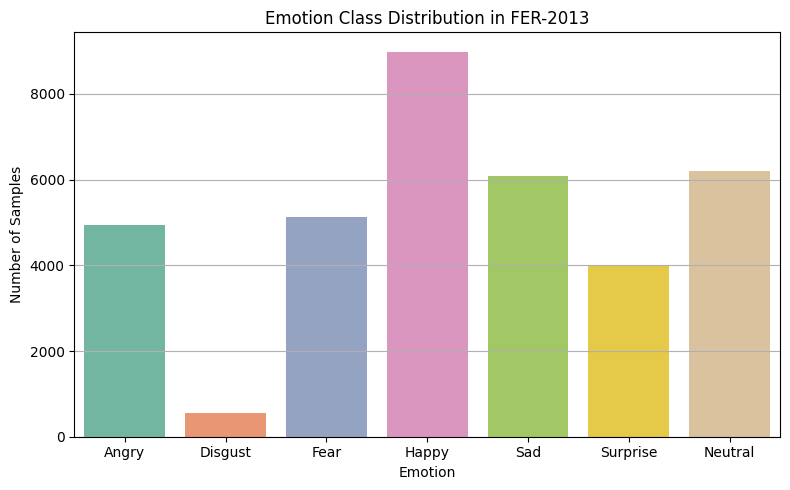

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='emotion_label', order=emotion_map.values(), palette='Set2')
plt.title('Emotion Class Distribution in FER-2013')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


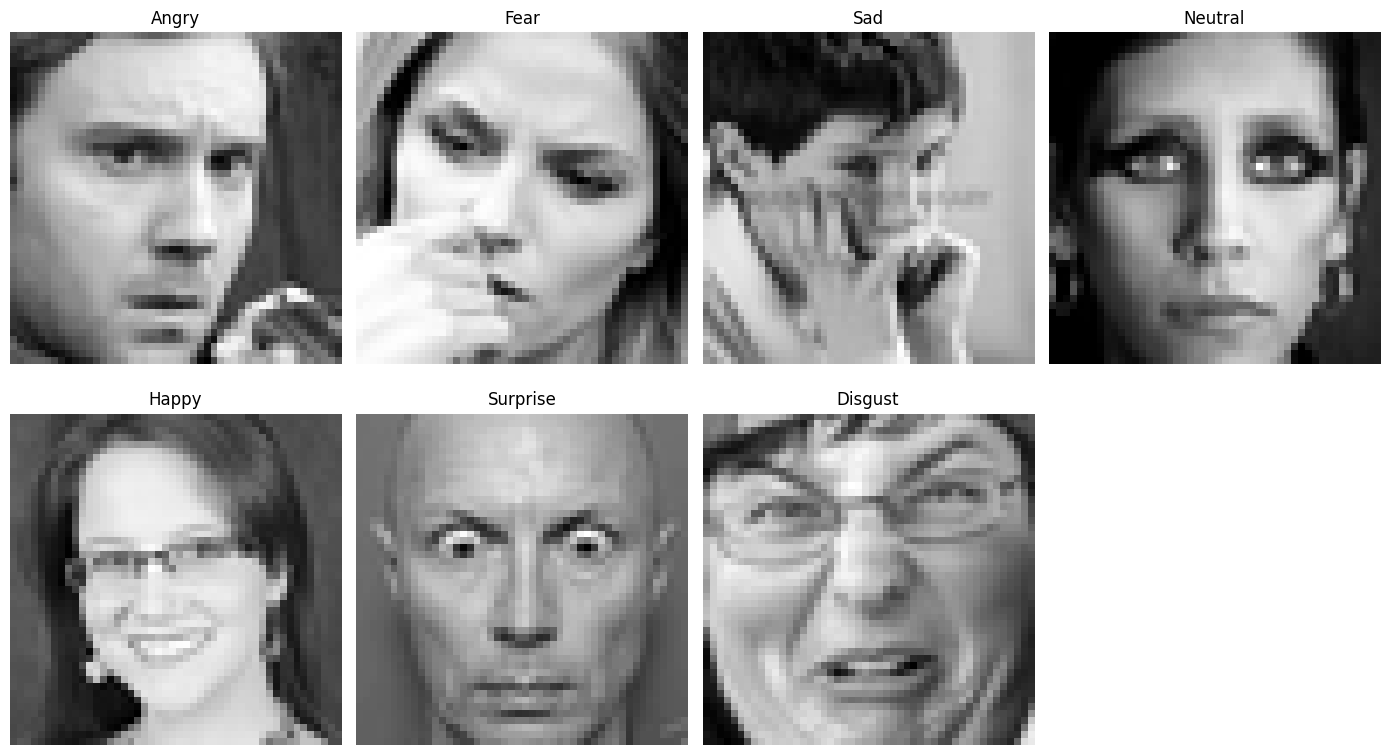

In [7]:
import numpy as np

plt.figure(figsize=(14, 8))
for i, emotion in enumerate(df['emotion_label'].unique()):
    pixels = df[df['emotion_label'] == emotion]['pixels'].iloc[0]
    img = np.array(pixels.split(), dtype='uint8').reshape(48, 48)
    plt.subplot(2, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')
plt.tight_layout()
plt.show()


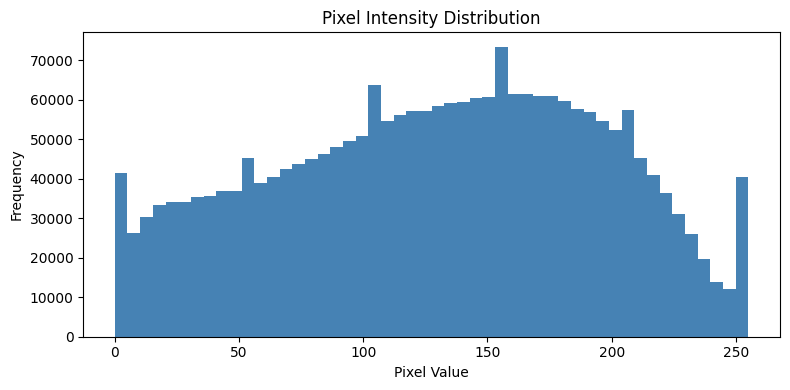

In [8]:
img_flat = df['pixels'].sample(1000).apply(lambda x: np.array(x.split(), dtype='uint8'))
all_pixels = np.concatenate(img_flat.to_list())

plt.figure(figsize=(8,4))
plt.hist(all_pixels, bins=50, color='steelblue')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


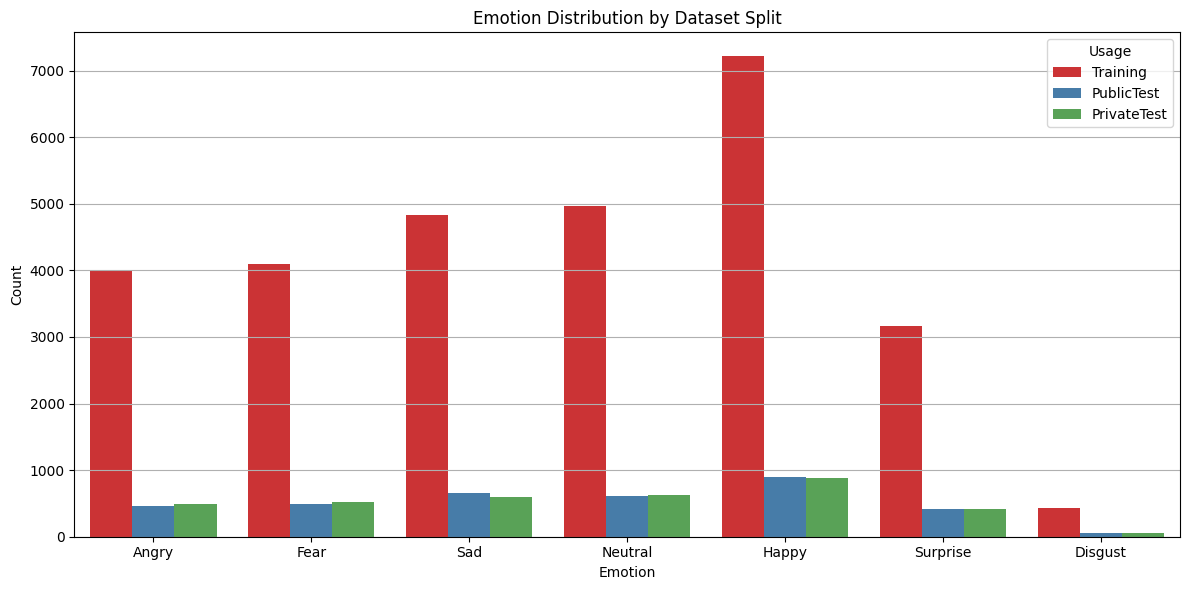

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='emotion_label', hue='Usage', order=df['emotion_label'].unique(), palette='Set1')
plt.title("Emotion Distribution by Dataset Split")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Imbalance is Severe for Disgust

In [10]:
# Take a random sample to avoid memory issues
sample_pixels = df['pixels'].sample(2000).apply(lambda x: np.fromstring(x, sep=' ', dtype=np.uint8))
stacked = np.stack(sample_pixels.to_numpy())

print("Mean pixel value:", np.mean(stacked))
print("Std deviation:", np.std(stacked))


Mean pixel value: 128.51871006944444
Std deviation: 64.77520952048619


In [11]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = df['emotion'].unique()
weights = compute_class_weight(class_weight='balanced', classes=classes, y=df[df['Usage'] == 'Training']['emotion'])
class_weights = dict(zip(classes, weights))
print("Class weights for training:", class_weights)


Class weights for training: {0: 1.0266046844269623, 2: 1.0010460615781582, 4: 0.8491274770777877, 6: 0.8260394187886635, 3: 0.5684387684387684, 5: 1.293372978330405, 1: 9.406618610747051}


weights to avoid biasing toward frequent category

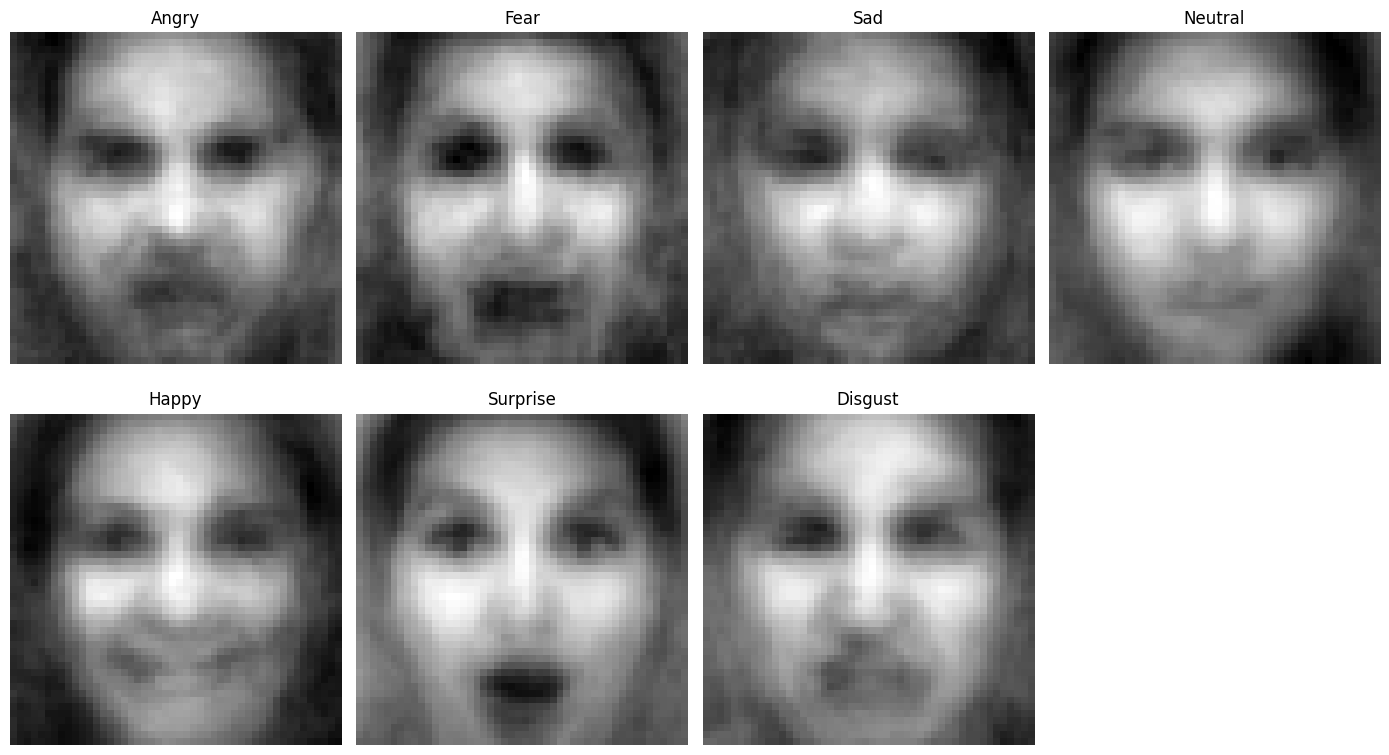

In [12]:
plt.figure(figsize=(14, 8))
for i, emotion in enumerate(df['emotion'].unique()):
    pixels_all = df[df['emotion'] == emotion]['pixels'].apply(lambda x: np.array(x.split(), dtype='uint8').reshape(48, 48))
    mean_img = np.mean(np.stack(pixels_all[:200]), axis=0)  # average of first 200 faces
    plt.subplot(2, 4, i + 1)
    plt.imshow(mean_img, cmap='gray')
    plt.title(emotion_map[emotion])
    plt.axis('off')
plt.tight_layout()
plt.show()


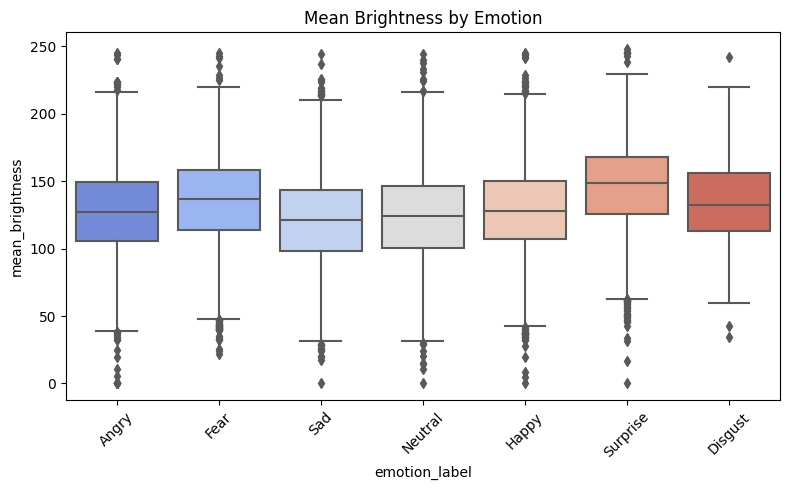

In [13]:
df['mean_brightness'] = df['pixels'].apply(lambda x: np.mean(np.array(x.split(), dtype='uint8')))
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='emotion_label', y='mean_brightness', palette='coolwarm')
plt.title("Mean Brightness by Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


should apply brightness shift during augmentation.